# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('C:/Users/Vera Osipchuk/Documents/Skill Factory/ML/02_lesson/ml-intro-hw/ml-intro-hw/data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('C:/Users/Vera Osipchuk/Documents/Skill Factory/ML/02_lesson/ml-intro-hw/ml-intro-hw/data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('C:/Users/Vera Osipchuk/Documents/Skill Factory/ML/02_lesson/ml-intro-hw/ml-intro-hw/data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [9]:
df_train.loc[:, "ORG_TP_STATE":]

,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,...,0,1,1,1,6,2,1,1580,1580,NaN
1,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,...,0,1,1,1,6,1,1,4020,4020,NaN
2,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,...,0,1,2,1,11,0,0,0,0,NaN
3,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,Частная компания,Без участия,Адм-хоз. и трансп. службы,от 20000 до 50000 руб.,12000,Белгородская область,Белгородская область,Белгородская область,Белгородская область,ЦЕНТРАЛЬНЫЙ 1,...,0,1,2,1,11,0,0,0,0,NaN
6,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,15000,Вологодская область,Вологодская область,Вологодская область,Вологодская область,ЦЕНТРАЛЬНЫЙ 2,...,0,1,2,2,14,0,0,0,0,NaN
7,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,6000,Волгоградская область,Волгоградская область,Волгоградская область,Волгоградская область,ЮЖНЫЙ,...,1,1,2,1,11,0,0,0,0,NaN
8,Частная компания,Без участия,Участие в основ. деятельности,свыше 50000 руб.,100000,Ярославская область,Ярославская область,Ярославская область,Ярославская область,ЦЕНТРАЛЬНЫЙ 2,...,0,1,1,1,3,0,0,0,0,NaN
9,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,...,0,1,1,1,6,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'


In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Два и более высших образования', 'Среднее', 'Неоконченное высшее', 'Среднее специальное', 'Ученая степень', 'Высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Ресторанный бизнес/Общественное питание', 'СМИ/Реклама/PR-агенства', 'Металлургия/Промышленность/Машиностроение', 'Торговля', 'Сборочные производства', 'Развлечения/Искусство', 'Страхование', 'Коммунальное хоз-во/Дорожные службы', 'Химия/Парфюмерия/Фармацевтика', 'Наука', 'Образование', 'Другие сферы', 'ЧОП/Детективная д-ть', 'Информационные услуги', 'Энергетика', 'Логистика', 'Банк/Финансы', 'Нефтегазовая промышленность', 'Маркетинг', 'Подбор персонала', 'Транспорт', 'Туризм', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'Недвижимость', 'Государственная служба', 'Салоны красоты и здоровья', 'Строительство', 'Сельское хозяйство', 'Здравоохранение', 'Информационные технологии'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски есть в столбцах GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR,TP_PROVINCE, WORK_TIME, PREVIOUS_CARD_NUM_UTILIZED.
Необходимо подобрать такое решение, чтобы минимально исказить результат оценки, но при этом сохранить репрезентативность данных.
Скорее всего столбец про количество утилизированных карт PREVIOUS_CARD_NUM_UTILIZED под отсутствием данных подразумевает 0. Поэтому пропуски можно заполнить нулями в нем.
По остальным столбцам можно оценить зависимость значений от полностью заполненных столбцов. Если сильная зависисмость от каких-то из полностью заполненных столбцов имеется, проигнорировать незаполненные столбцы.
Если все же столбцы придется оставлять, то можно выкинуть строки с незаполненными значениями, но, учитывая, что, например, по  GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR отсутствует примерно 10% данных, то этим пользоваться я бы не стала, тк результат прогноза может быть сильно искажен.
Поэтому можно заполнить значения средним арифметическим или медианой, если признаки некатегориальные. Плюс можно ввести доп атрибут - вес дополненных значений и сделать его меньше, чем у имеющихся значения. Также можно  заполнить пропуски пропорционально имеющимся данным.
Но оптимальным вариантом считаю дополение отсутствиующих значений с помощью модели линейной регрессии, построенной на известных значениях набора данных. Хотя для меня это пока слишком сложно.

А вообще я посмотрела еще раз на столбцы WORK_TIME, GEN_TITLE, GEN_INDUSTRY, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR и поняла, что это скорее всего просто неработающие люди, поэтому для WORK_TIME можно проставить нули, а остальным добавить категорию "отсутствует".

Все остальное можно просто не учитывать, тк их процент от общего количества будет маленький.


In [16]:
df_train[df_train.WORK_TIME.isnull()][['GEN_TITLE', 'WORK_TIME', 'GEN_INDUSTRY', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']]

,GEN_TITLE,WORK_TIME,GEN_INDUSTRY,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
16,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Есть. Добавить столбцы, соответствующие каждому значению. При этом, в том столбце, который будет соответствовать значению, напротив строки будет 1, если в этой строке раньше содержалось значение = названию столбца. В остальных столбцах будет 0.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [52]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop('AGREEMENT_RK', axis=1)
       
    requiredColumns = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in requiredColumns:
        df_output[i] = df_output[i].map(lambda x: str(x).replace(',', '.')).astype('float')   
    
    df_output.loc[df_output.WORK_TIME.isnull(),['GEN_TITLE', 'GEN_INDUSTRY', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']] = 'отсутсвует'
                    
    zeroColumns = ['PREVIOUS_CARD_NUM_UTILIZED', 'WORK_TIME']
    for i in zeroColumns:
        df_output[i] = df_output[i].map(lambda x: str(x).replace('nan', '0')).astype('float')  
    
    df_output = df_output[df_output.TP_PROVINCE.notnull()]
        
    categorialColumns = []
    categorialColumnsName = []
    counter = 0
    for i in df_output.columns:
        if (str(df_output[i].dtype) == 'object') and (i != 'sample'):
            categorialColumns.append(counter)
            categorialColumnsName.append(i)
        counter += 1     
            
    le = LabelEncoder()
    
    for c in categorialColumns:
        df_output.iloc[:, c] = df_output.iloc[:, c].apply(str)
        le.fit(df_output.iloc[:, c])
        df_output.iloc[:, c] = le.transform(df_output.iloc[:, c])
        pd.to_numeric(df_output.iloc[:, c]).astype(np.float)
       
    data = df_output.drop(categorialColumnsName, axis=1)
    
    df_out = df_output.iloc[:, categorialColumns]
    
    one_hot = OneHotEncoder()
    one_hot.fit(df_out)
    transformed = one_hot.transform(df_out)
    trans = pd.DataFrame(transformed.todense())
       
    df_output = trans.join(data)

    return df_output

In [55]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)

df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


#df.replace

vot          0    1    2    3    4    5    6    7    8    9   ...    GEN_PHONE_FL  \
0      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   ...             1.0   
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   ...             0.0   
2      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   ...             1.0   
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   ...             1.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...             1.0   
5      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   ...             0.0   
6      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   ...             1.0   
7      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   ...             1.0   
8      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   ...             0.0   
9      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   ...             1.0   
10     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   ...             1.0   
11     0.0  0.0  0.0  0.

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [64]:
X = df_train_preproc.drop('TARGET', axis=1)
X_test = df_test_preproc.drop('TARGET', axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [65]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X_train_split, y_train_split)
predict_dtc = dtc.predict(X_test_split)

rfc = RandomForestClassifier()
rfc.fit(X_train_split, y_train_split)
predict_rfc = rfc.predict(X_test_split)

lr = LogisticRegression()
lr.fit(X_train_split, y_train_split)
predict_lr = lr.predict(X_test_split)

In [100]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

precision_dtc = precision_score(y_test_split, predict_dtc)
recall_dtc = recall_score(y_test_split, predict_dtc)
accuracy_dtc = accuracy_score(y_test_split, predict_dtc)


precision_rfc = precision_score(y_test_split, predict_rfc)
recall_rfc = recall_score(y_test_split, predict_rfc)
accuracy_rfc = accuracy_score(y_test_split, predict_rfc)


precision_lr = precision_score(y_test_split, predict_lr)
recall_lr = recall_score(y_test_split, predict_lr)
accuracy_lr = accuracy_score(y_test_split, predict_lr)


metrics = {'dtc': [precision_dtc, recall_dtc, accuracy_dtc],
           'rfc': [precision_rfc, recall_rfc, accuracy_rfc],
           'lr': [precision_lr, recall_lr, accuracy_lr]
          }

df_metrics = pd.DataFrame(data=metrics, index=['precision', 'recall', 'accuracy'])

df_metrics

,dtc,lr,rfc
precision,0.142857,0.500000,0.375000
recall,0.145709,0.003992,0.011976
accuracy,0.798745,0.883570,0.882640


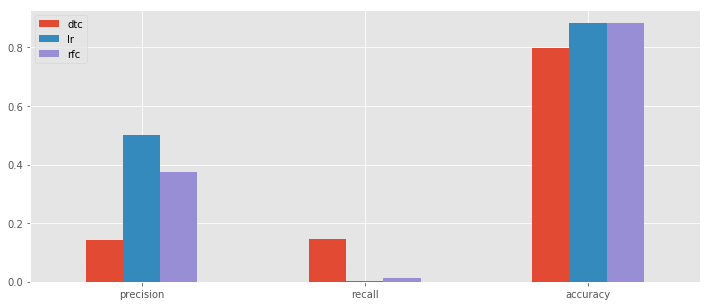

In [101]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)


df_metrics.plot.bar(rot=0)



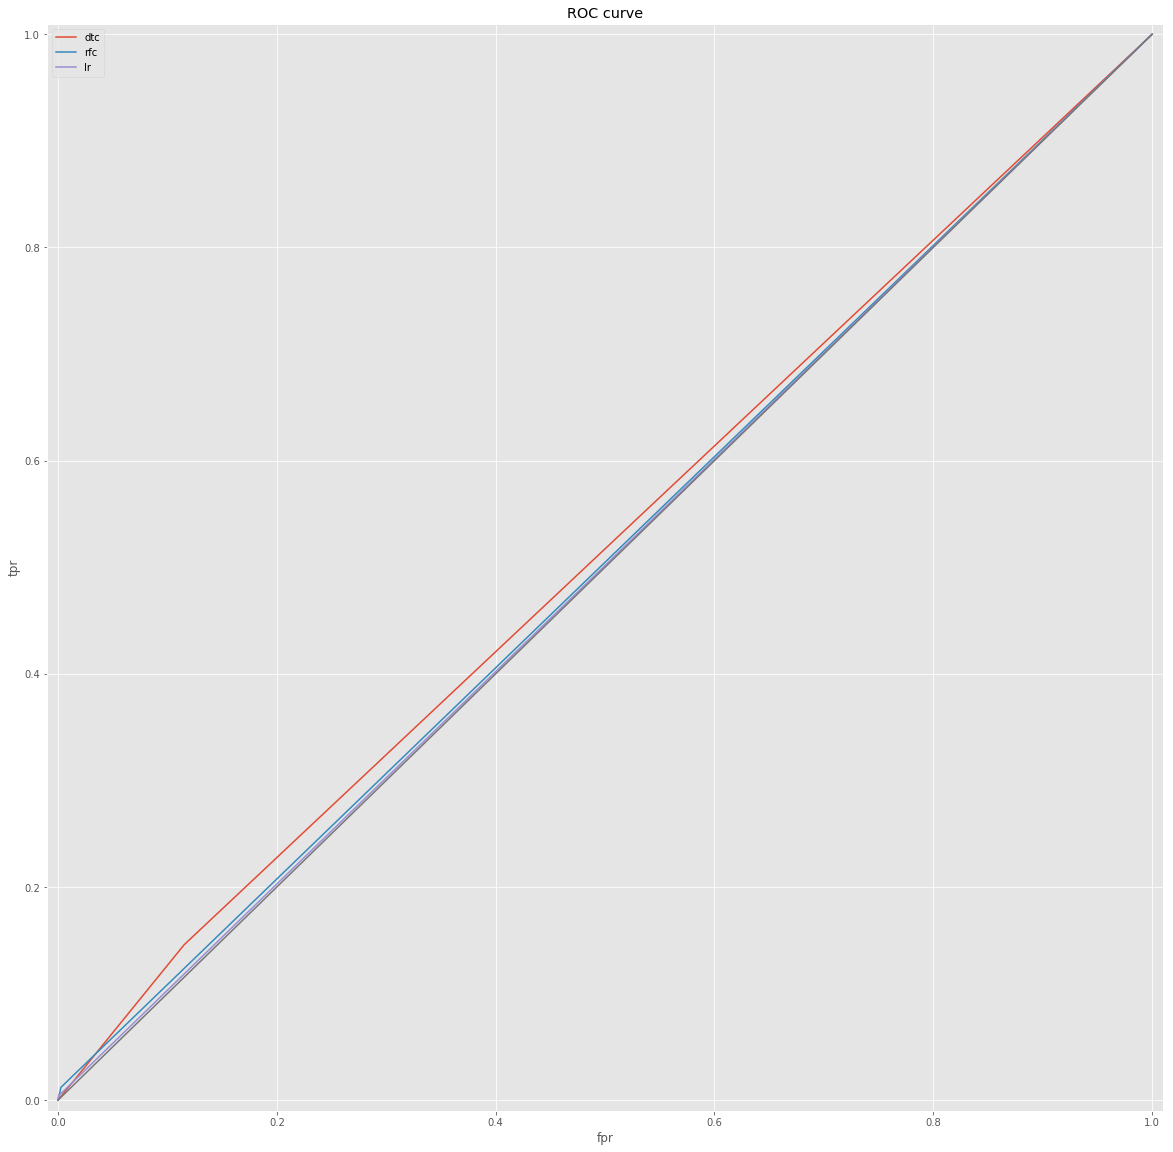

In [89]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test_split, predict_dtc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_split, predict_rfc)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_split, predict_lr)
plt.figure(figsize=(20, 20))
plt.plot(fpr_dtc, tpr_dtc, label ='dtc')
plt.plot(fpr_rfc, tpr_rfc, label ='rfc')
plt.plot(fpr_lr, tpr_lr, label ='lr')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [96]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


roc_auc_dtc = cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)



roc_auc_rfc = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

roc_auc_lr = cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

print('dtc', roc_auc_dtc.mean(), 'rfc', roc_auc_rfc.mean(), 'lr', roc_auc_lr.mean())

dtc 0.519352856342 rfc 0.565526815183 lr 0.637683241926


In [103]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


lr.fit(X_test, y_test)
predict_result = lr.predict_proba(X_test)
predict_result

array([[ 0.82565937,  0.17434063],
       [ 0.92666599,  0.07333401],
       [ 0.86838206,  0.13161794],
       ..., 
       [ 0.8107702 ,  0.1892298 ],
       [ 0.94635174,  0.05364826],
       [ 0.81385879,  0.18614121]])

In [99]:
# Померить roc_auc на тесте
roc_auc_score(y_test, predict_result)

0.50014471027984841